In [1]:
#!pip install chart_studio

In [2]:
%time

Wall time: 0 ns


In [3]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

# <a id='1'>1. Introduction to date and time</a>

## <a id='1.1'>1.1 Importing time series data</a>

### How to import data?
First, we import all the datasets needed for this kernel. The required time series column is imported as a datetime column using **parse_dates** parameter and is also selected as index of the dataframe using **index_col** parameter. 
#### Data being used:-
1. Senex Energy Limited(sel)  Stocks Data


In [13]:
sel = pd.read_csv('SXY.AX-1988-2022.csv', index_col='Date', parse_dates=['Date'])
sel.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1988-01-29,7.165657,7.165657,7.165657,7.165657,6.885041,0
1988-02-01,7.165657,7.165657,7.165657,7.165657,6.885041,0
1988-02-02,7.165657,7.165657,7.165657,7.165657,6.885041,0
1988-02-03,7.165657,7.165657,7.165657,7.165657,6.885041,0
1988-02-04,7.165657,7.165657,7.165657,7.165657,6.885041,0


In [15]:
sel.fillna(method='bfill', inplace=True)
sel.head()

AttributeError: 'NoneType' object has no attribute 'fillna'

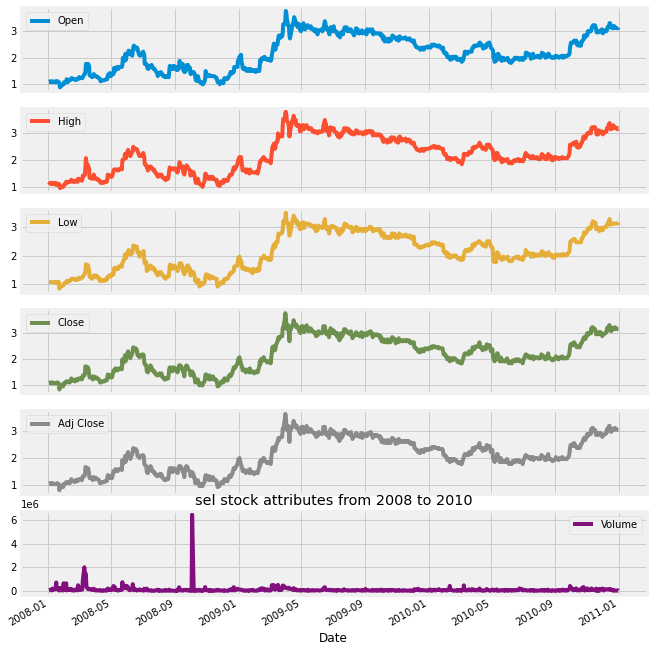

In [6]:
sel['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('sel stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

# <a id='2'>2. Finance and statistics</a>

## <a id='2.1'>2.1 Percent change</a>

<AxesSubplot:xlabel='Date'>

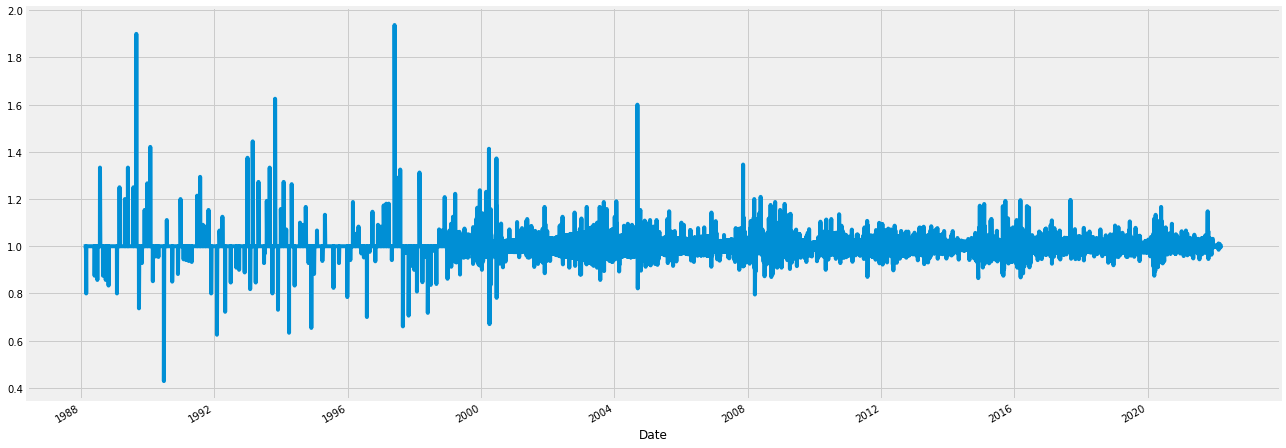

In [7]:
sel['Change'] = sel.High.div(sel.High.shift())
sel['Change'].plot(figsize=(20,8))

## <a id='2.2'>2.2 Stock returns</a> 

In [8]:
sel['Return'] = sel.Change.sub(1).mul(100)
sel['Return'].plot(figsize=(20,8))

NameError: name 'google' is not defined

In [ ]:
sel.High.pct_change().mul(100).plot(figsize=(22,8))

## <a id='2.3'>2.3 Absolute change in successive rows</a>

In [ ]:
sel.High.diff().plot(figsize=(20,7))

## <a id='2.4'>2.4 Comaring two or more time series</a> 

We will compare 2 time series by normalizing them. This is achieved by dividing each time series element of all time series by the first element. This way both series start at the same point and can be easily compared.

In [ ]:
# We choose microsoft stocks to compare them with google
google = pd.read_csv("C:/Users/ShubhamSurya_ljtsrll/AI-Training/Machine Learning/TimeSeries/TimeSeries/GOOGL_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date'])

In [ ]:
# Plotting before normalization
google.High.plot()
sel.High.plot()
plt.legend(['Google','sel'])
plt.show()

In [ ]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_sel = sel.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_sel.plot()
plt.legend(['Google','sel'])
plt.show()

You can clearly see how google outperforms microsoft over time.

## <a id='2.5'>2.5 Window functions</a>
Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

**Rolling** - Same size and sliding

**Expanding** - Contains all prior values

In [ ]:
# Rolling window functions
rolling_sel = sel.High.rolling('90D').mean()
sel.High.plot()
rolling_sel.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

Now, observe that rolling mean plot is a smoother version of the original plot.

In [ ]:
# Expanding window functions
microsoft_mean = sel.High.expanding().mean()
microsoft_std = sel.High.expanding().std()
sel.High.plot()
sel.plot()
sel.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## <a id='2.6'>2.6 OHLC charts</a>
An OHLC chart is any type of price chart that shows the open, high, low and close price of a certain time period. Open-high-low-close Charts (or OHLC Charts) are used as a trading tool to visualise and analyse the price changes over time for securities, currencies, stocks, bonds, commodities, etc. OHLC Charts are useful for interpreting the day-to-day sentiment of the market and forecasting any future price changes through the patterns produced.

The y-axis on an OHLC Chart is used for the price scale, while the x-axis is the timescale. On each single time period, an OHLC Charts plots a symbol that represents two ranges: the highest and lowest prices traded, and also the opening and closing price on that single time period (for example in a day). On the range symbol, the high and low price ranges are represented by the length of the main vertical line. The open and close prices are represented by the vertical positioning of tick-marks that appear on the left (representing the open price) and on right (representing the close price) sides of the high-low vertical line.

Colour can be assigned to each OHLC Chart symbol, to distinguish whether the market is "bullish" (the closing price is higher then it opened) or "bearish" (the closing price is lower then it opened).

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg">

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/OHLC_chart.html)

In [ ]:
# OHLC chart of June 2008
trace = go.Ohlc(x=sel['06-2008'].index,
                open=sel['06-2008'].Open,
                high=sel['06-2008'].High,
                low=sel['06-2008'].Low,
                close=sel['06-2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [ ]:
# OHLC chart of 2008
trace = go.Ohlc(x=sel['2008'].index,
                open=sel['2008'].Open,
                high=sel['2008'].High,
                low=sel['2008'].Low,
                close=sel['2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [ ]:
# OHLC chart of 2008
trace = go.Ohlc(x=sel.index,
                open=sel.Open,
                high=sel.High,
                low=sel.Low,
                close=sel.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

 ## <a id='2.7'>2.7 Candlestick charts</a>
This type of chart is used as a trading tool to visualise and analyse the price movements over time for securities, derivatives, currencies, stocks, bonds, commodities, etc. Although the symbols used in Candlestick Charts resemble a Box Plot, they function differently and therefore, are not to be confused with one another.

Candlestick Charts display multiple bits of price information such as the open price, close price, highest price and lowest price through the use of candlestick-like symbols. Each symbol represents the compressed trading activity for a single time period (a minute, hour, day, month, etc). Each Candlestick symbol is plotted along a time scale on the x-axis, to show the trading activity over time.

The main rectangle in the symbol is known as the real body, which is used to display the range between the open and close price of that time period. While the lines extending from the bottom and top of the real body is known as the lower and upper shadows (or wick). Each shadow represents the highest or lowest price traded during the time period represented. When the market is Bullish (the closing price is higher than it opened), then the body is coloured typically white or green. But when the market is Bearish (the closing price is lower than it opened), then the body is usually coloured either black or red.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/candlestick_chart.svg">

Candlestick Charts are great for detecting and predicting market trends over time and are useful for interpreting the day-to-day sentiment of the market, through each candlestick symbol's colouring and shape. For example, the longer the body is, the more intense the selling or buying pressure is. While, a very short body, would indicate that there is very little price movement in that time period and represents consolidation.

Candlestick Charts help reveal the market psychology (the fear and greed experienced by sellers and buyers) through the various indicators, such as shape and colour, but also by the many identifiable patterns that can be found in Candlestick Charts. In total, there are 42 recognised patterns that are divided into simple and complex patterns. These patterns found in Candlestick Charts are useful for displaying price relationships and can be used for predicting the possible future movement of the market. You can find a list and description of each pattern here.

Please bear in mind, that Candlestick Charts don't express the events taking place between the open and close price - only the relationship between the two prices. So you can't tell how volatile trading was within that single time period.

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/candlestick_chart.html)

In [ ]:
# Candlestick chart of march 2008
trace = go.Candlestick(x=sel['03-2008'].index,
                open=sel['03-2008'].Open,
                high=sel['03-2008'].High,
                low=sel['03-2008'].Low,
                close=sel['03-2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [ ]:
# Candlestick chart of 2000
trace = go.Candlestick(x=sel['2000'].index,
                open=sel['2000'].Open,
                high=sel['2000'].High,
                low=sel['2000'].Low,
                close=sel['2000'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [ ]:
# Candlestick chart of 1988-2022
trace = go.Candlestick(x=sel.index,
                open=sel.Open,
                high=sel.High,
                low=sel.Low,
                close=sel.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

# <a id='3'>3. Time series decomposition and Random walks</a>

## <a id='3.1'>3.1. Trends, seasonality and noise</a>
These are the components of a time series
* Trend - Consistent upwards or downwards slope of a time series
* Seasonality - Clear periodic pattern of a time series(like sine funtion)
* Noise - Outliers or missing values

In [ ]:
# Let's take Google stocks High for this
sel["High"].plot(figsize=(16,8))

In [ ]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_sel_volume = sm.tsa.seasonal_decompose(sel["High"],freq=360) # The frequncy is annual
figure = decomposed_sel_volume.plot()
plt.show()

### Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [ ]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(sel["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))


##### As microsoft has p-value 2.3953198043568264e-09 which is less than 0.05, null hypothesis is rejected and this is not a random walk.

In [ ]:
# The original non-stationary plot
decomposed_sel_volume.trend.plot()

In [ ]:
# The new stationary plot
decomposed_sel_volume.trend.diff().plot()

## Prediction using ARMA models
I am not simulating any model because it's quite similar to AR and MA models. Just  forecasting and predictions for this one.

In [ ]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(sel["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(sel["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

ARMA model shows much better results than AR and MA models.

## Prediction using ARIMA model

In [ ]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(sel["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(sel["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

Taking the slight lag into account, this is a fine model.

## <a id='4.5'>4.5 VAR models</a>
Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term. VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

<img src="http://gdurl.com/VvRm">

In [ ]:
# Predicting closing price of Google and sel
train_sample = pd.concat([google["Close"].diff().iloc[1:],sel["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

## <a id='4.6.1'>4.6.1 SARIMA models</a>
SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

In [ ]:
# Predicting closing price of Google'
train_sample = sel["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

In [ ]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('sel Closing prices')
plt.show()

In [ ]:
# Predicting closing price of sel'
train_sample = sel["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

In [ ]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

## <a id='4.6.3'>4.6.3 Dynamic Factor models</a>
Dynamic-factor models are flexible models for multivariate time series in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors, which have a vector autoregressive structure. The unobserved factors may also be a function of exogenous covariates. The disturbances in the equations for the dependent variables may be autocorrelated.

In [ ]:
# Predicting closing price of Google and sel
train_sample = pd.concat([google["Close"].diff().iloc[1:],sel["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))